# Data Visualization
Data visualization is the practice of translating information into a visual context, such as a chart or graph, to make data easier for the human brain to understand and pull insights from. The main goal of data visualization is to make it easier to identify patterns, trends and outliers in large data sets.
### 1. Data preparation
        1.1 Check number of words per review
        1.2 Check rating percentage
	    1.3 Standardization
###  2. Visualization 
        2.1 Rating Distribution
        2.2 Relationship between year and sentiment count
	    2.3 Relationship between month and reviews count
	    2.4 Relationship between rating and number of helpful reviews
	    2.5 Creating word cloud 

In [1]:
# General packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
#Visualization libraries
import matplotlib.pyplot as plt 
from matplotlib import rcParams
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
from plotly.offline import iplot

In [3]:
# NLP packages
import nltk 
from nltk import word_tokenize
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords

### Importing Data

In [4]:
# Reading data from .csv file
Reviews = pd.read_csv("Pre-processing_DatafinitiElectronicsProductData")

In [5]:
Reviews.head()

,Unnamed: 0,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,...,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight,lowercase_text_reviews,withoutstop_reviews_text,stemmed_reviews_text,lemma_reviews_text
0,0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,this keyboard is very easy to type on but the...,"['keyboard', 'easy', 'type', 'fingerprint', 'r...","['keyboard ', 'easi ', 'type ', 'fingerprint '...","['keyboard ', 'easy ', 'type ', 'fingerprint '..."
1,1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,it s thin and light i can type pretty easily ...,"['thin', 'light', 'type', 'pretty', 'easily']","['thin ', 'light ', 'type ', 'pretti ', 'easil...","['thin ', 'light ', 'type ', 'pretty ', 'easil..."
2,2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,i love the new design the keys are spaced well...,"['love', 'new', 'design', 'keys', 'spaced', 'w...","['love ', 'new ', 'design ', 'key ', 'space ',...","['love ', 'new ', 'design ', 'key ', 'space ',..."
3,3,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,Attached easily and firmly. Has a nice feel. A...,Nice keyboard,UpstateNY,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,attached easily and firmly has a nice feel a...,"['attached', 'easily', 'firmly', 'nice', 'feel...","['attach ', 'easili ', 'firmli ', 'nice ', 'fe...","['attach ', 'easily ', 'firmly ', 'nice ', 'fe..."
4,4,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,"Our original keyboard was okay, but did not ha...",Nice improvement,Glickster,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,our original keyboard was okay but did not ha...,"['original', 'keyboard', 'okay', 'laptop', 'fe...","['origin ', 'keyboard ', 'okay ', 'laptop ', '...","['original ', 'keyboard ', 'okay ', 'laptop ',..."


In [6]:
Reviews.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1800 non-null   int64  
 1   id                        1800 non-null   object 
 2   asins                     1800 non-null   object 
 3   brand                     1800 non-null   object 
 4   categories                1800 non-null   object 
 5   colors                    1800 non-null   object 
 6   dateAdded                 1800 non-null   object 
 7   dateUpdated               1800 non-null   object 
 8   dimension                 1800 non-null   object 
 9   ean                       1800 non-null   float64
 10  imageURLs                 1800 non-null   object 
 11  keys                      1800 non-null   object 
 12  manufacturer              1800 non-null   object 
 13  manufacturerNumber        1800 non-null   object 
 14  name    

### Check number of words per review

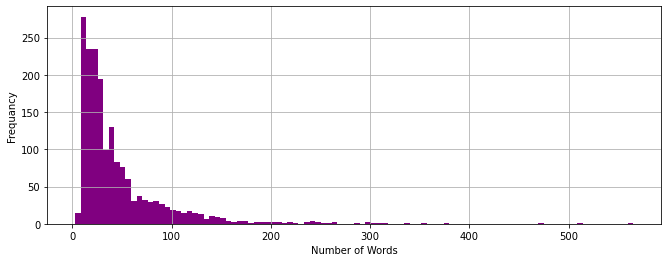

In [7]:
# Getting the number of words by splitting them by a space
numof_words_per_review = Reviews['lowercase_text_reviews'].apply(lambda x: len(x.split(" ")))
numof_words_per_review.hist(bins=100, color='Purple', figsize=(11, 4))
plt.xlabel('Number of Words')
plt.ylabel('Frequancy')
plt.show() 

In [8]:
print('Average words:', numof_words_per_review.mean())

Average words: 46.32333333333333


### Check rating percentage

In [9]:
# calculating the rating percentage
rating_percentVal = 100* Reviews['reviews.rating'].value_counts()/len(Reviews)
rating_percentVal

5.0    61.222222
4.0    26.055556
3.0     6.333333
2.0     3.222222
1.0     3.166667
Name: reviews.rating, dtype: float64

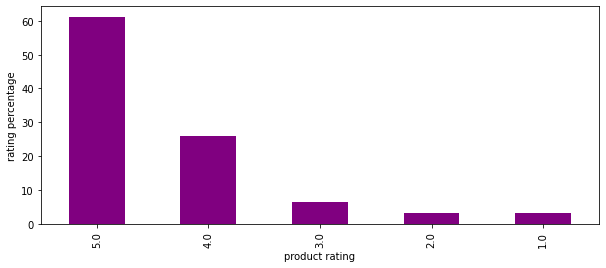

In [10]:
rating_percentVal.plot.bar(figsize=(10,4),color='Purple')
plt.xlabel('product rating')
plt.ylabel('rating percentage')
plt.show()

### Standardization the Ratings

In [11]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['reviews.rating'] == 3.0:
        val = 'Neutral'
    elif row['reviews.rating'] == 1.0 or row['reviews.rating'] == 2.0:
        val = 'Negative'
    elif row['reviews.rating'] == 4.0 or row['reviews.rating'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [12]:
#Applying the function in our new column
Reviews['reviews.rating'] = Reviews.apply(f, axis=1)
Reviews.head(3)

,Unnamed: 0,id,asins,brand,categories,colors,dateAdded,dateUpdated,dimension,ean,...,reviews.text,reviews.title,reviews.username,sourceURLs,upc,weight,lowercase_text_reviews,withoutstop_reviews_text,stemmed_reviews_text,lemma_reviews_text
0,0,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,"This keyboard is very easy to type on, but the...",Love the fingerprint reader,JNH1,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,this keyboard is very easy to type on but the...,"['keyboard', 'easy', 'type', 'fingerprint', 'r...","['keyboard ', 'easi ', 'type ', 'fingerprint '...","['keyboard ', 'easy ', 'type ', 'fingerprint '..."
1,1,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,It's thin and light. I can type pretty easily ...,Nice,Appa,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,it s thin and light i can type pretty easily ...,"['thin', 'light', 'type', 'pretty', 'easily']","['thin ', 'light ', 'type ', 'pretti ', 'easil...","['thin ', 'light ', 'type ', 'pretty ', 'easil..."
2,2,AVpf3txeLJeJML43FN82,B0168YIWSI,Microsoft,"Electronics,Computers,Computer Accessories,Key...",Black,2015-11-13T12:28:09Z,2018-01-29T02:15:13Z,11.6 in x 8.5 in x 0.19 in,8.900000e+11,...,I love the new design the keys are spaced well...,New,Kman,https://www.walmart.com/ip/Microsoft-Surface-P...,8.900000e+11,1.1 pounds,i love the new design the keys are spaced well...,"['love', 'new', 'design', 'keys', 'spaced', 'w...","['love ', 'new ', 'design ', 'key ', 'space ',...","['love ', 'new ', 'design ', 'key ', 'space ',..."


In [13]:
Reviews['reviews.rating'].value_counts()

Positive    1571
Negative     115
Neutral      114
Name: reviews.rating, dtype: int64

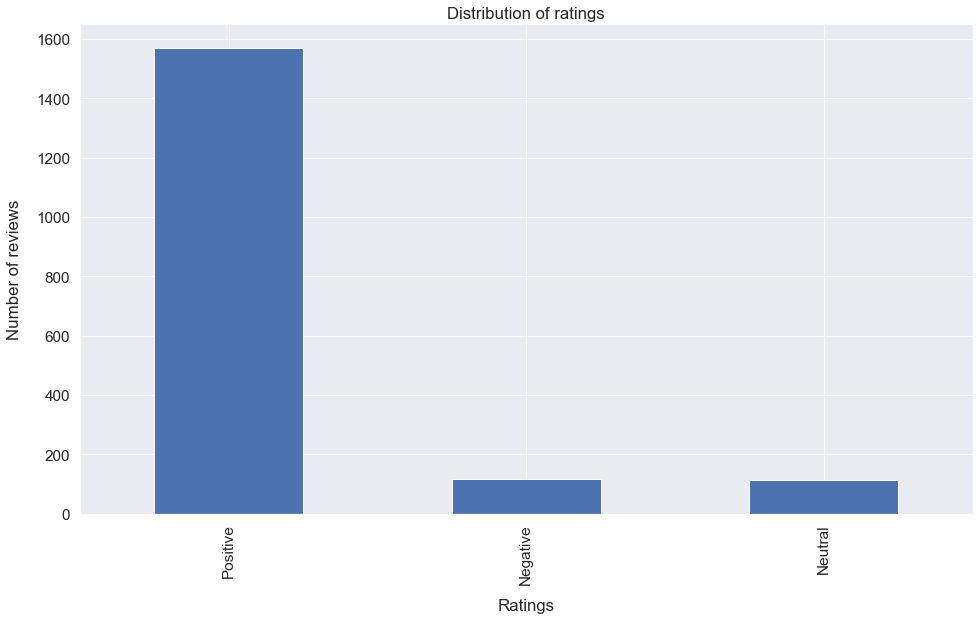

In [21]:
Reviews['reviews.rating'].value_counts().plot.bar()


plt.xlabel("Ratings", labelpad=14)
plt.ylabel("Number of reviews", labelpad=14)
plt.title("Distribution of ratings");

### Year and Sentiment count

In [15]:
import datetime
Reviews['reviews.date'] = pd.to_datetime(Reviews['reviews.date'], format='%Y-%m-%d')
Reviews['review_year'] = pd.DatetimeIndex(Reviews['reviews.date']).year
Reviews['review_month']  = pd.DatetimeIndex(Reviews['reviews.date']).month
# Selecting years that has all kinds of sentiment 
Select_Year = Reviews.loc[ lambda Reviews : (Reviews['review_year'] >= 2014).tolist() ]

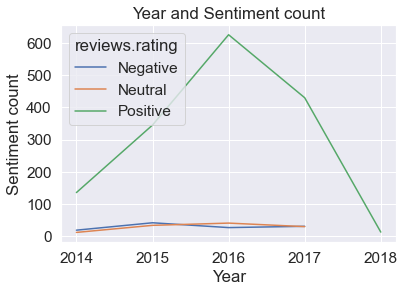

In [16]:
# Year vs Sentiment count
Select_Year.groupby(['review_year','reviews.rating'])['reviews.rating'].count().unstack().plot(legend=True)
plt.title('Year and Sentiment count')
plt.xlabel('Year')
plt.ylabel('Sentiment count')
plt.show()

### Month vs Reviews count
Check if there are any relationship between reviews and month of year

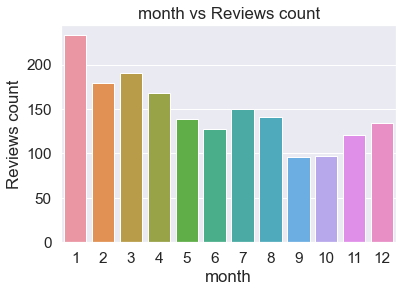

In [17]:
#Creating a dataframe
month=pd.DataFrame(Select_Year.groupby('review_month')['reviews.rating'].count()).reset_index()
month['review_month']=month['review_month'].astype('int64')
month.sort_values(by=['review_month'])

#Plotting the graph
sns.barplot(x="review_month", y="reviews.rating", data=month)
plt.title('month vs Reviews count')
plt.xlabel('month')
plt.ylabel('Reviews count')
plt.show()

In [18]:
Select_Year['review_month'].sort_index(ascending=False).value_counts()

1     233
3     190
2     179
4     168
7     150
8     141
5     139
12    134
6     128
11    121
10     97
9      96
Name: review_month, dtype: int64

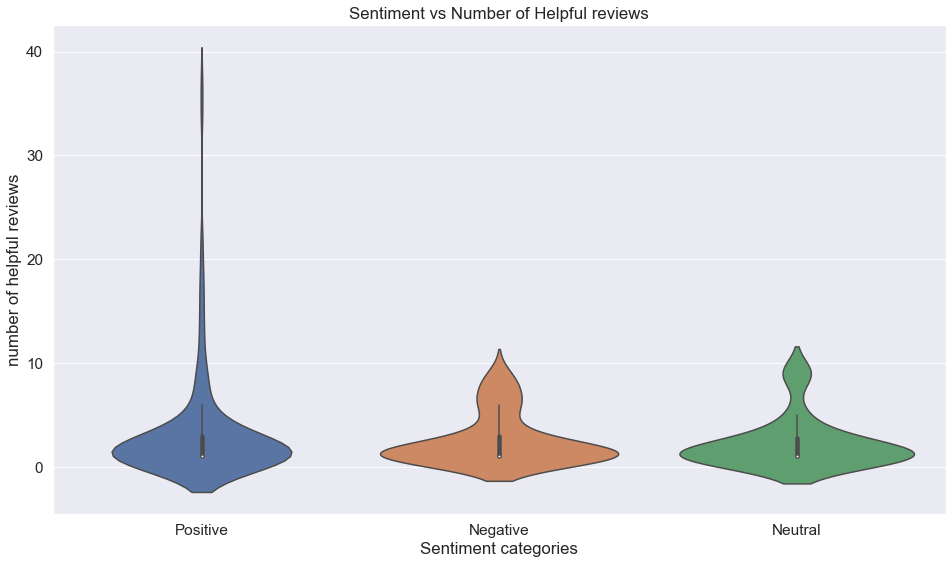

In [19]:
#plot layout
plt.rcParams.update({'font.size': 18})
rcParams['figure.figsize'] = 16,9

# Creating dataframe and removing 0 helpfulrate records
senti_help= pd.DataFrame(Select_Year, columns = ['reviews.rating', 'reviews.numHelpful'])
senti_help = senti_help[senti_help['reviews.numHelpful'] != 0.00] 

#Plotting phase
sns.violinplot( x=senti_help["reviews.rating"], y=senti_help["reviews.numHelpful"])
plt.title('Sentiment vs Number of Helpful reviews')
plt.xlabel('Sentiment categories')
plt.ylabel('number of helpful reviews')
plt.show()

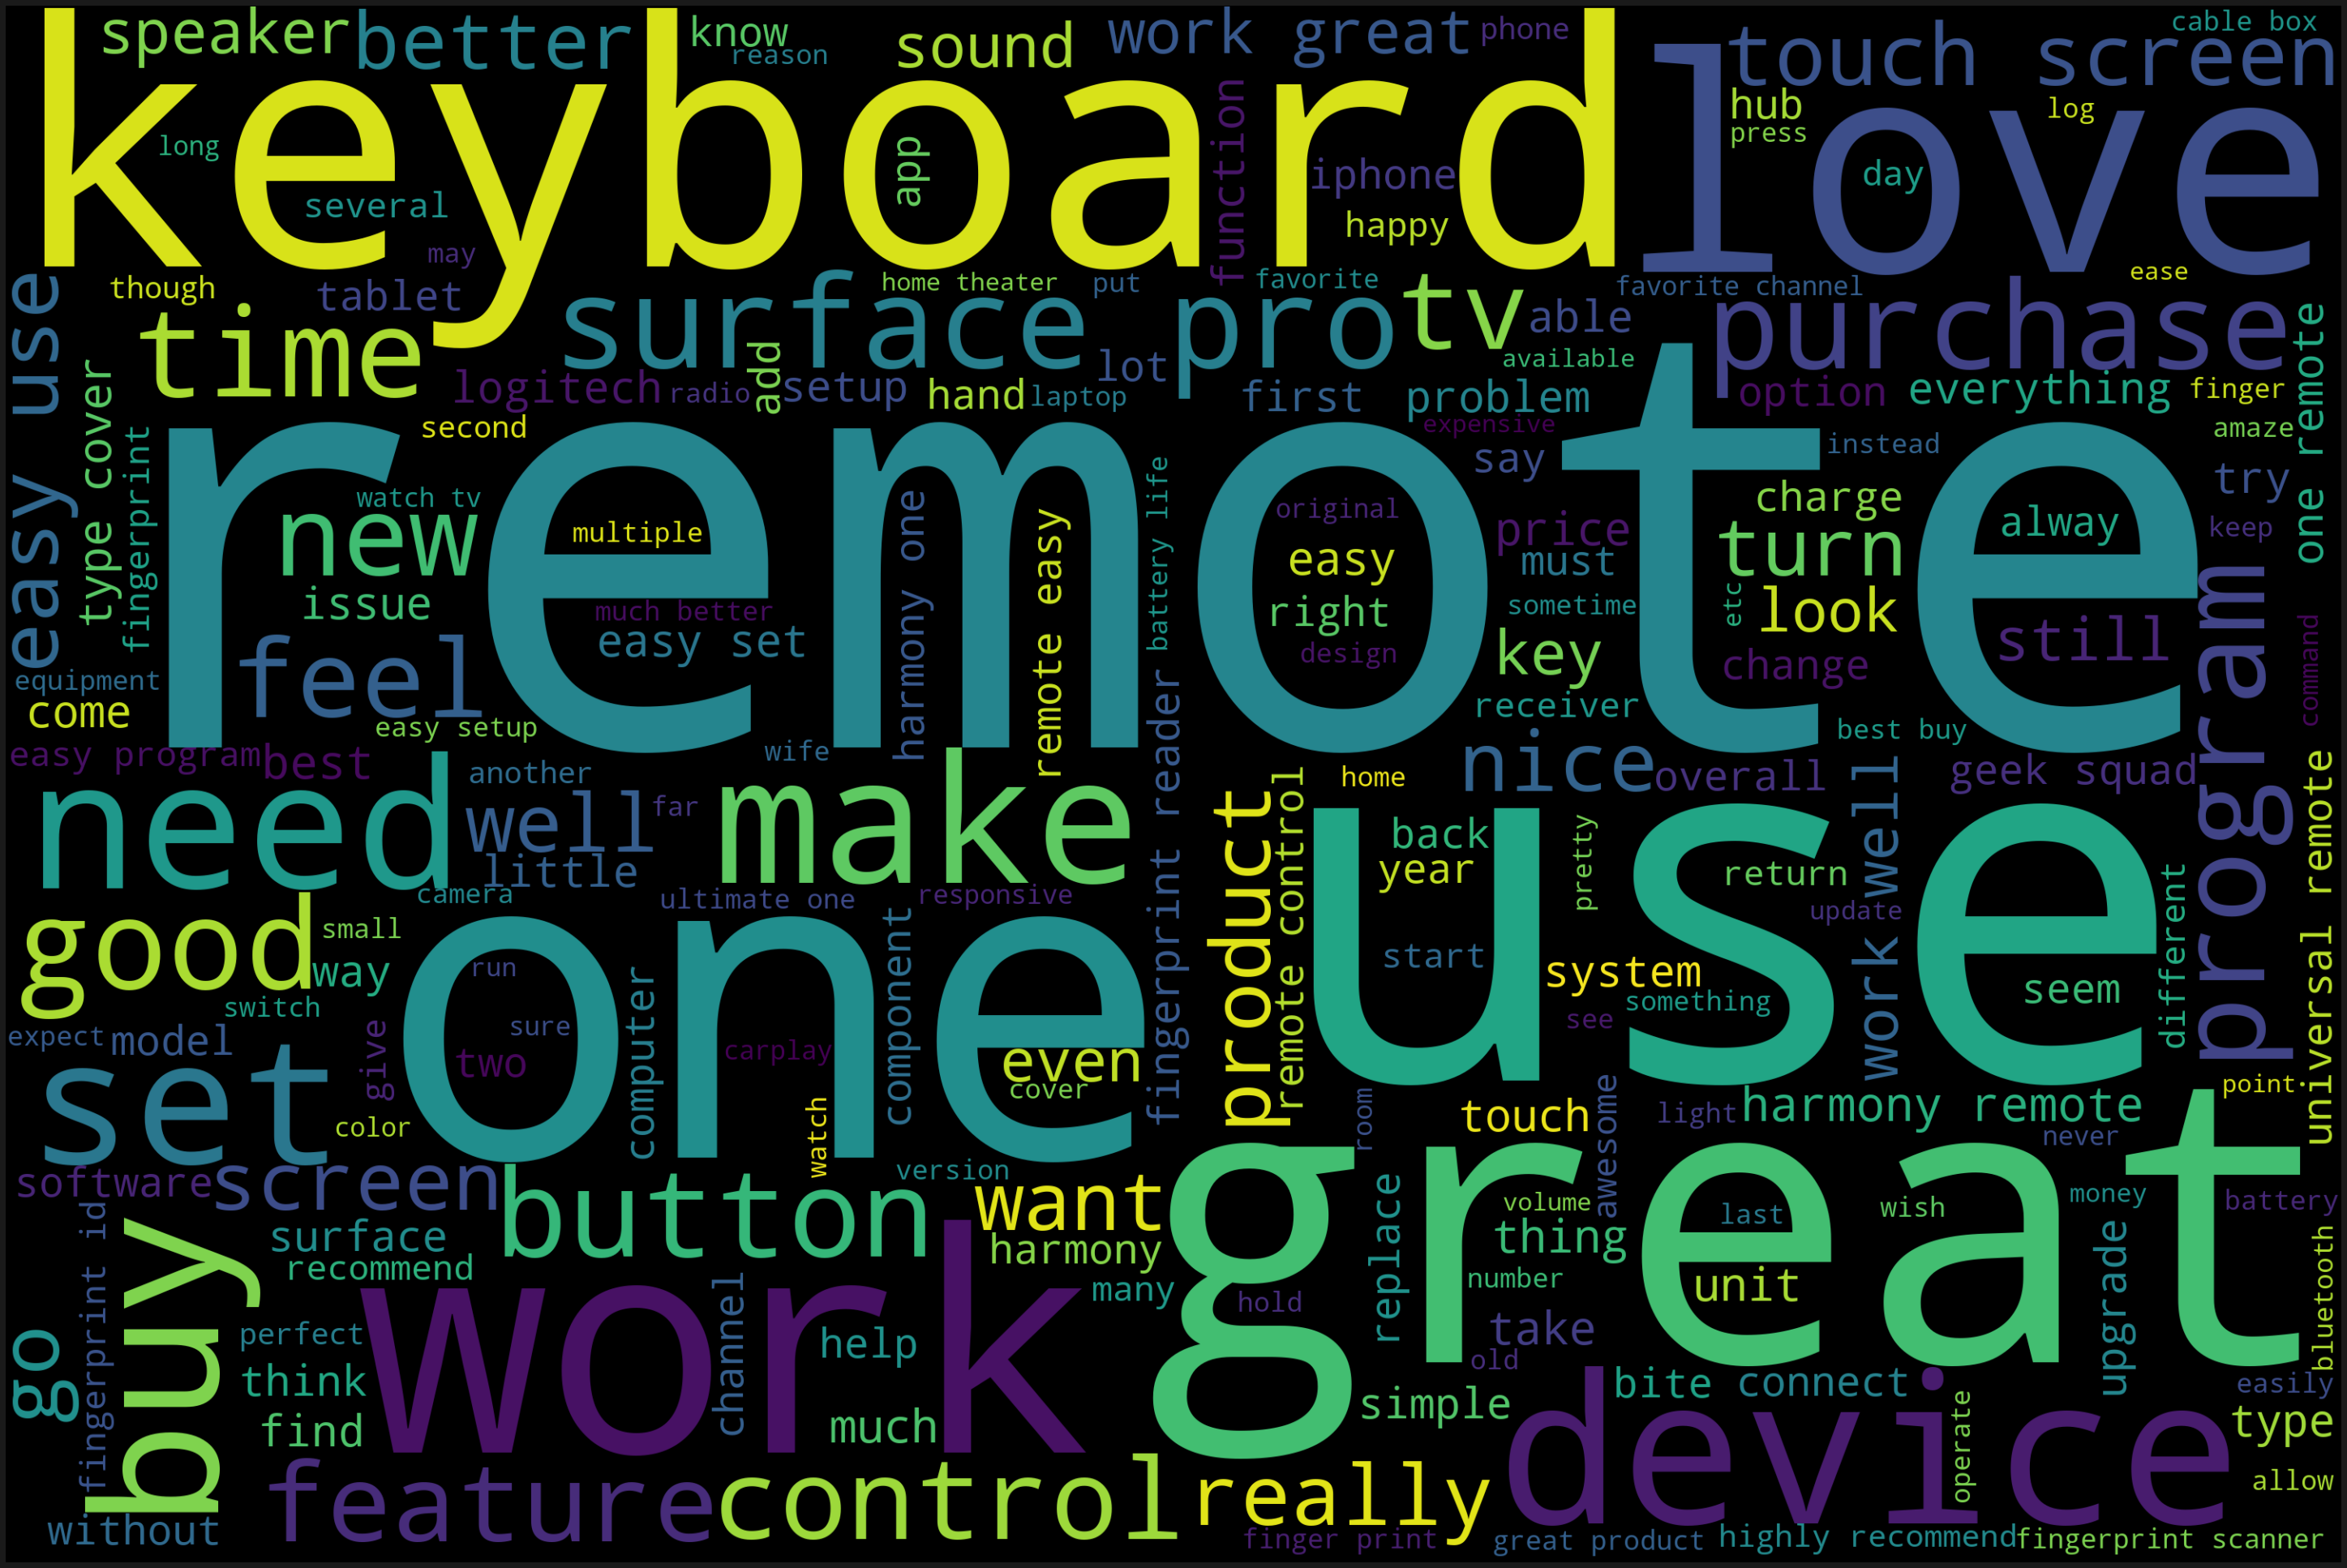

In [20]:
text_word_cloud = ''.join(str (l) for l in Select_Year['lemma_reviews_text'])

wc = WordCloud( 
                width = 3000,
                height = 2000,).generate(text_word_cloud)

plt.figure(
            figsize = (40, 30),
            facecolor = 'k',
            edgecolor = 'k')
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

As a distribution of the text in a visualization way, a word cloud displays the words in different sizes, indicating the frequency of the each word in the text. Looking at the word cloud, it shows that the reviews are related to the electronic products such as: "Speakers", "Headphones", "Keyboard", etc. 
Some words are related to the customers experiences, such as: "buy", "love", "best", "great".